In [1]:
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# code to print inline without print statements
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to reduce scikit warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore', category=FutureWarning)

# Marketing Qualified Leads (MQL) Dataset

In [3]:
# Import the data into a dataframe
mql = pd.read_csv("./marketing-funnel-olist/olist_marketing_qualified_leads_dataset.csv")
mql.head()
mql.shape # should be 8000

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


(8000, 4)

In [4]:
# Convert first_contact_date to pandas datatime
mql['first_contact_date'] = pd.to_datetime(mql['first_contact_date'], format="%Y-%m-%d")
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null datetime64[ns]
landing_page_id       8000 non-null object
origin                7940 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


In [5]:
mql.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,c37cc97f8ce18a041b73ae6a749c55a0,2018-05-02 00:00:00,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296
first,NaN,2017-06-14 00:00:00,NaN,NaN
last,NaN,2018-05-31 00:00:00,NaN,NaN


**Insights**
----------------
1. Dataset has **8000 unique leads**

2. Origin has **10** unique categories, with **60 leads** missing their source of origin

2. Dataset has potential leads who visited the site between at **June 14th 2017 and May 31st 2018**

3. **495** unique landing pages

In [6]:
mql['first_contact_month'] = mql['first_contact_date'].dt.month
mql['first_contact_day'] = mql['first_contact_date'].dt.weekday_name
mql['weekday_ind'] = np.where(mql['first_contact_date'].dt.dayofweek.isin([0,1,2,3,4]), 1, 0) # weekday indicator
mql.head()

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,first_contact_day,weekday_ind
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2,Thursday,1
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,10,Friday,1
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,3,Thursday,1
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,1,Monday,1
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2,Wednesday,1


#### Most popular Origin source?

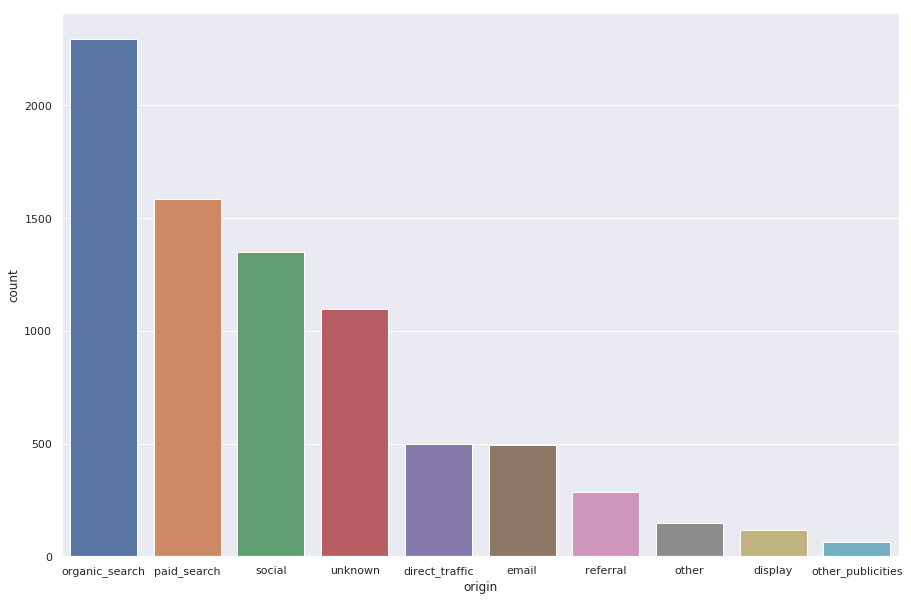

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x = mql['origin'], data = mql, order = mql.origin.value_counts().index)

In [8]:
# origin = mql.groupby('origin')['mql_id'].count().reset_index(name="count_origins")
# origin['pctLeadsVisited'] = (origin['count_origins'] / len(mql)) * 100
# origin.sort_values(by = 'count_origins', ascending = False).head(n=20)
mql.origin.value_counts(normalize=True)

organic_search       0.289169
paid_search          0.199748
social               0.170025
unknown              0.138413
direct_traffic       0.062846
email                0.062091
referral             0.035768
other                0.018892
display              0.014861
other_publicities    0.008186
Name: origin, dtype: float64

**Insights**
----------------
- **Organic Search** is the most popular category generating **29%** of the leads to the store
- Top **three** sources (OS, PS & Social) of traffic generate close to **66% of the leads** to the store

#### First Page Visited

In [9]:
# count of MQLs by landing page
# lPageId = mql.groupby('landing_page_id')['mql_id'].count().reset_index(name="count_leads")
# lPageId['pctLeadsVisited'] = (lPageId['count_leads'] / len(mql)) * 100
# lPageId.sort_values(by = 'count_leads', ascending = False).head(n=10)
mql.landing_page_id.value_counts(normalize=True).head(n=10)

b76ef37428e6799c421989521c0e5077    0.114000
22c29808c4f815213303f8933030604c    0.110375
58326e62183c14b0c03085c33b9fdc44    0.061875
88740e65d5d6b056e0cda098e1ea6313    0.055625
ce1a65abd0973638f1c887a6efcfa82d    0.049250
40dec9f3d5259a3d2dbcdab2114fae47    0.041250
f017be4dbf86243af5c1ebed0cff36a2    0.038750
e492ee5eaf1697716985cc6f33f9cd9b    0.036375
a7982125ff7aa3b2054c6e44f9d28522    0.019500
73f31a40697cc90a86c1273563ac230e    0.014375
Name: landing_page_id, dtype: float64

**Insights**
----------------

- *b76ef37428e6799c421989521c0e5077* is the most popular landing page with almost **11.5%** of the overall lead visits 
- Top **10 pages** landing pages account for **55%** of the leads visits, and top **25 pages** account for **67%** of the leads who visited the OList site

Monday       0.186875
Wednesday    0.186375
Tuesday      0.181500
Thursday     0.169250
Friday       0.143750
Sunday       0.066375
Saturday     0.065875
Name: first_contact_day, dtype: float64

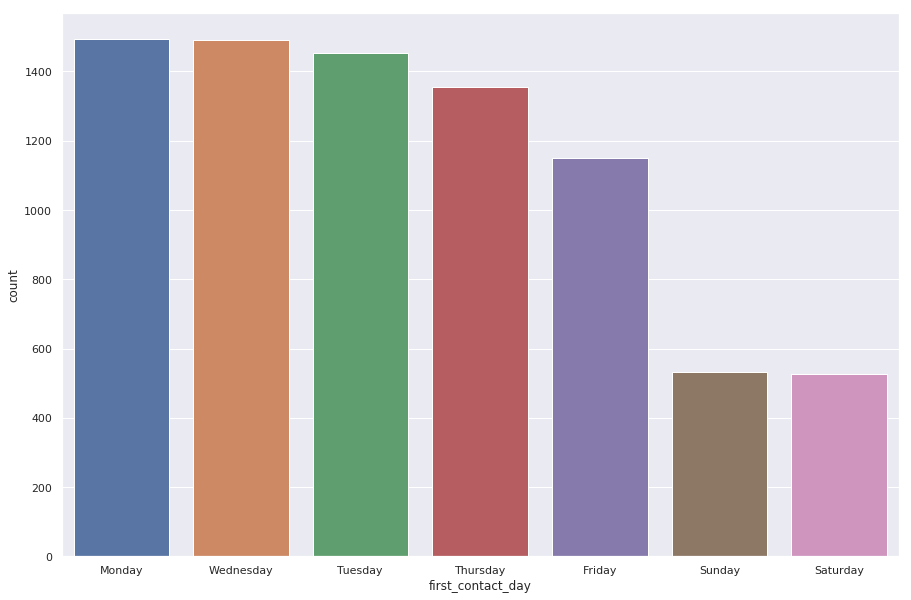

In [10]:
mql.first_contact_day.value_counts(normalize=True).head(n=10)
sns.countplot(x = mql['first_contact_day'], data = mql, order = mql.first_contact_day.value_counts().index)

4     0.169000
5     0.162875
3     0.146750
1     0.142625
2     0.128500
11    0.055625
10    0.052000
8     0.048250
9     0.039000
7     0.029875
Name: first_contact_month, dtype: float64

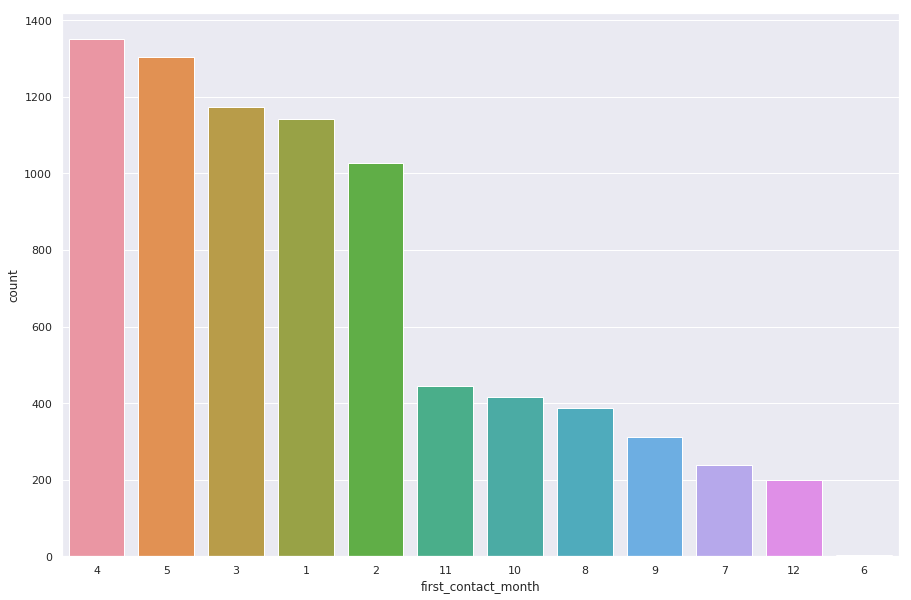

In [11]:
mql.first_contact_month.value_counts(normalize=True).head(n=10)
sns.countplot(x = mql['first_contact_month'], data = mql, order = mql.first_contact_month.value_counts().index)

**Insights**
----------------

- Most of the leads are signing up to be contacted during the **weekdays**
- Cannot conclude that first half of the year has more sign-up as the data provided is only from June to May

#### Merge with Closed Deals Dataset

In [12]:
cd = pd.read_csv("./marketing-funnel-olist/olist_closed_deals_dataset.csv")
cd.head()
len(cd) # should be 842

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


842

In [13]:
# Convert won_date to pandas datetime
cd['won_date'] = pd.to_datetime(cd['won_date'], format="%Y-%m-%d %H:%M:%S")
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
mql_id                           842 non-null object
seller_id                        842 non-null object
sdr_id                           842 non-null object
sr_id                            842 non-null object
won_date                         842 non-null datetime64[ns]
business_segment                 841 non-null object
lead_type                        836 non-null object
lead_behaviour_profile           665 non-null object
has_company                      63 non-null object
has_gtin                         64 non-null object
average_stock                    66 non-null object
business_type                    832 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue         842 non-null float64
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 92.2+ KB


In [14]:
# left join MQL and CD datasets
mf = mql.merge(cd, on='mql_id', how='left')
mf.shape
# create closed_deal column
mf['closed_deal'] = np.where(mf['seller_id'].isna() == False, 1, 0 ) # 1 when seller ID is not NA
# create days to close column
mf['days_to_close'] = mf['won_date'] - mf['first_contact_date'] # number of days from first contact to close
mf['days_to_close_num'] = mf['days_to_close']/np.timedelta64(1,'D') # number of days from first contact to close in num format
mf[mf.days_to_close_num.isna() == False].head()

(8000, 20)

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,first_contact_day,weekday_ind,seller_id,sdr_id,sr_id,...,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,closed_deal,days_to_close,days_to_close_num
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2,Wednesday,1,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,...,cat,NaN,NaN,NaN,reseller,NaN,0.0,1,5 days 19:58:54,5.832569
12,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,4,Wednesday,1,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,...,eagle,NaN,NaN,NaN,reseller,NaN,0.0,1,34 days 20:17:59,34.845822
14,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,4,Tuesday,1,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,...,cat,NaN,NaN,NaN,reseller,NaN,0.0,1,63 days 17:27:23,63.727350
39,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,1,Sunday,0,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,...,NaN,NaN,NaN,NaN,reseller,NaN,0.0,1,3 days 13:51:03,3.577118
67,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,10,Monday,1,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,...,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,1,267 days 20:17:45,267.845660


In [15]:
# check for any cases where won date is earlier than first contact date
mf[mf['days_to_close_num'] < 0]
mf.drop(6357, inplace=True)
print("\n")
print("Should return Zero -- " + str(len(mf[mf['days_to_close_num'] < 0])))

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,first_contact_day,weekday_ind,seller_id,sdr_id,sr_id,...,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,closed_deal,days_to_close,days_to_close_num
6357,b91cf8812365f50ff4bda4bcd6206b05,2018-03-08,4aab772aeb9833c170d8ea5413e02eac,organic_search,3,Thursday,1,5e063e85d44b0f5c3e6ec3131103a57e,a8387c01a09e99ce014107505b92388c,495d4e95a8cf8bbf8b432b612a2aa328,...,cat,NaN,NaN,NaN,reseller,NaN,0.0,1,-2 days +19:38:55,-1.181308




Should return Zero -- 0


In [16]:
# Basic stats on numbers of days to close after first contact
print("Fastest close - " + str(mf.days_to_close.min()))
print("Slowest close - " + str(mf.days_to_close.max()))
print("Average days to close - " + str(mf.days_to_close.mean()))
print("Median number of days to close - " + str(mf.days_to_close.median()))
print("Standard Deviation of days to close - " + str(mf.days_to_close.std()))

Fastest close - 0 days 02:00:00
Slowest close - 427 days 13:14:37
Average days to close - 49 days 03:51:12.171224
Median number of days to close - 14 days 17:19:55
Standard Deviation of days to close - 75 days 08:38:01.457963


**Insights**
----------------
1. **Close Deal Percentage - 10.5%**
2. Fastest close - 0 days 02:00:00
3. Slowest close - 427 days 13:14:37
4. Average days to close - 49 days 03:51:12.171224
5. Median number of days to close - 14 days 17:19:55
6. Standard Deviation of days to close - 75 days 08:38:01.457963

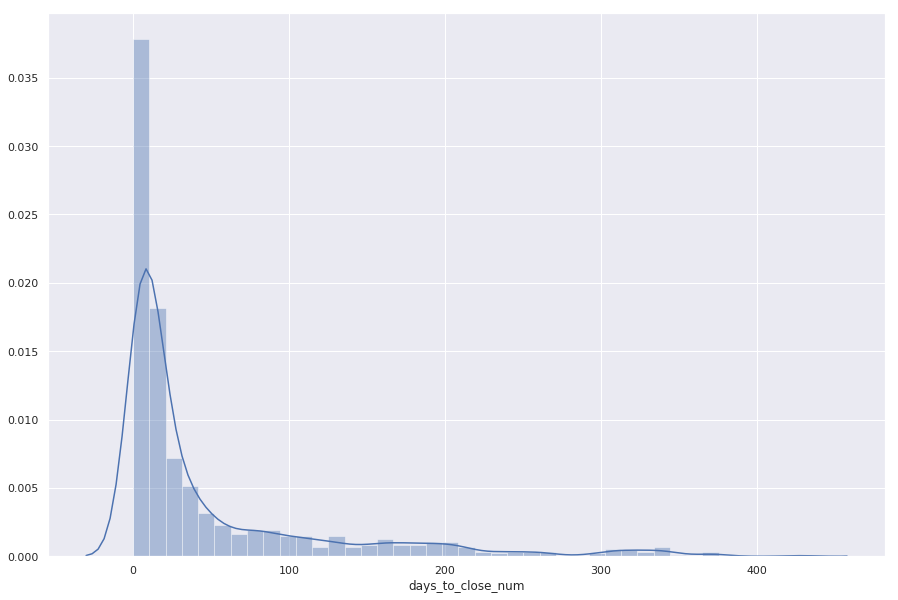

In [17]:
# mf['ln'] = np.log10(mf.days_to_close_num)
sns.distplot(mf[mf['days_to_close_num'].isna() == False]['days_to_close_num'])
# heavily right skewed distribution, consider log transformation if the target is the number of days to close

In [18]:
# create dataset with only closed deals
newMF = mf[mf.closed_deal == 1]
newMF.shape # should be 841
newMF.head()

(841, 23)

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,first_contact_day,weekday_ind,seller_id,sdr_id,sr_id,...,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,closed_deal,days_to_close,days_to_close_num
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2,Wednesday,1,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,...,cat,NaN,NaN,NaN,reseller,NaN,0.0,1,5 days 19:58:54,5.832569
12,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,4,Wednesday,1,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,...,eagle,NaN,NaN,NaN,reseller,NaN,0.0,1,34 days 20:17:59,34.845822
14,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,4,Tuesday,1,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,...,cat,NaN,NaN,NaN,reseller,NaN,0.0,1,63 days 17:27:23,63.727350
39,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,1,Sunday,0,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,...,NaN,NaN,NaN,NaN,reseller,NaN,0.0,1,3 days 13:51:03,3.577118
67,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,10,Monday,1,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,...,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,1,267 days 20:17:45,267.845660


organic_search       0.326481
paid_search          0.235792
unknown              0.216445
social               0.090689
direct_traffic       0.067715
referral             0.029021
email                0.018138
display              0.007255
other                0.004837
other_publicities    0.003628
Name: origin, dtype: float64

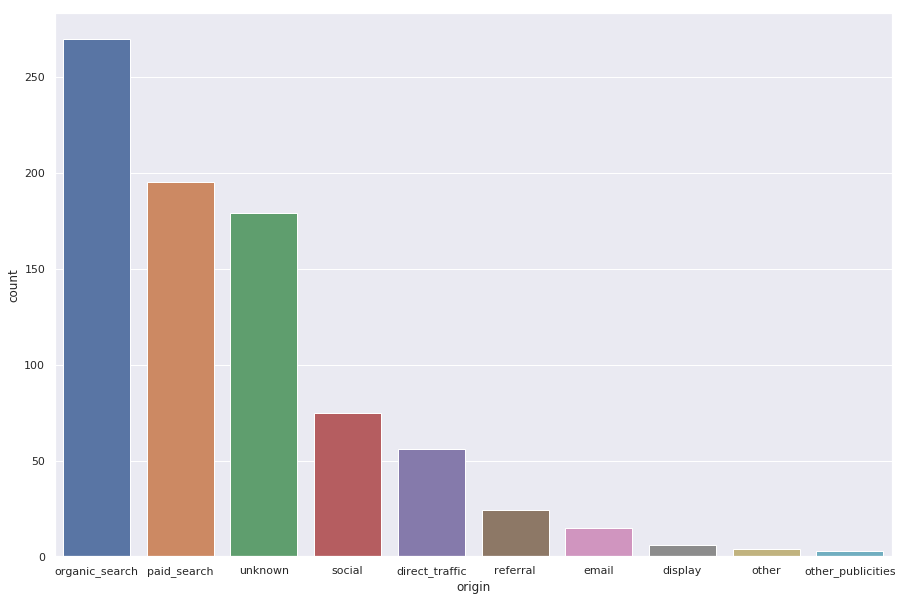

In [19]:
newMF.origin.value_counts(normalize=True)
sns.countplot(x = newMF.origin, data = newMF, order = newMF.origin.value_counts().index)

In [20]:
newMF.landing_page_id.value_counts(normalize=True).head(n=10)

22c29808c4f815213303f8933030604c    0.206897
b76ef37428e6799c421989521c0e5077    0.203329
40dec9f3d5259a3d2dbcdab2114fae47    0.079667
ce1a65abd0973638f1c887a6efcfa82d    0.070155
88740e65d5d6b056e0cda098e1ea6313    0.036861
58326e62183c14b0c03085c33b9fdc44    0.032105
f017be4dbf86243af5c1ebed0cff36a2    0.024970
a7982125ff7aa3b2054c6e44f9d28522    0.021403
241f79c7a8fe0270f4fb79fcbbcd17ad    0.016647
7fa6214d82e911d070f51ef79381b956    0.013080
Name: landing_page_id, dtype: float64

In [21]:
newMF.weekday_ind.value_counts(normalize=True).head()

1    0.882283
0    0.117717
Name: weekday_ind, dtype: float64

**Insights**
----------------
- **Organic Search and Paid Search** account for **56%** of customers who closed the deal
- **Top 2 landing pages** account for **41%** of customers who closed the deal
    - *22c29808c4f815213303f8933030604c & b76ef37428e6799c421989521c0e5077*
- **88%** of the leads who end up converting have requested to be contacted during weekdays

#### Merge with Sellers Dataset

In [22]:
sellers = pd.read_csv("./marketing-funnel-olist/ecommerce/olist_sellers_dataset.csv")
sellers.head()
sellers.shape

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


(3095, 4)

In [23]:
sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,1d8dbc4f32378d715c717c1c1fc57bae,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [24]:
newMFSell = newMF.merge(sellers, how = 'left', on = 'seller_id')
newMFSell.shape
newMFSell.head()

(841, 26)

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,first_contact_day,weekday_ind,seller_id,sdr_id,sr_id,...,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,closed_deal,days_to_close,days_to_close_num,seller_zip_code_prefix,seller_city,seller_state
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2,Wednesday,1,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,...,NaN,reseller,NaN,0.0,1,5 days 19:58:54,5.832569,30421.0,belo horizonte,MG
1,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,4,Wednesday,1,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,...,NaN,reseller,NaN,0.0,1,34 days 20:17:59,34.845822,NaN,NaN,NaN
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,4,Tuesday,1,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,...,NaN,reseller,NaN,0.0,1,63 days 17:27:23,63.727350,93542.0,novo hamburgo,RS
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,1,Sunday,0,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,...,NaN,reseller,NaN,0.0,1,3 days 13:51:03,3.577118,NaN,NaN,NaN
4,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,10,Monday,1,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,...,NaN,manufacturer,NaN,0.0,1,267 days 20:17:45,267.845660,11015.0,santos,SP


In [25]:
print("{:.2%}".format(len(newMFSell[newMFSell.seller_city.isna()])/len(newMF)) + " of the Sellers have missing City & State details.")
newMFSell.seller_city.value_counts(normalize=True).head()

54.93% of the Sellers have missing City & State details.


sao paulo         0.229551
rio de janeiro    0.039578
guarulhos         0.031662
curitiba          0.023747
ribeirao preto    0.021108
Name: seller_city, dtype: float64

home_decor                         0.125000
health_beauty                      0.109524
car_accessories                    0.091667
household_utilities                0.084524
construction_tools_house_garden    0.082143
audio_video_electronics            0.076190
computers                          0.040476
pet                                0.035714
food_supplement                    0.033333
food_drink                         0.030952
sports_leisure                     0.029762
bags_backpacks                     0.026190
bed_bath_table                     0.026190
toys                               0.023810
fashion_accessories                0.022619
home_office_furniture              0.016667
stationery                         0.015476
phone_mobile                       0.015476
small_appliances                   0.014286
handcrafted                        0.014286
baby                               0.011905
music_instruments                  0.010714
books                           

[Text(0, 0, 'home_decor'),
 Text(0, 0, 'health_beauty'),
 Text(0, 0, 'car_accessories'),
 Text(0, 0, 'household_utilities'),
 Text(0, 0, 'construction_tools_house_garden'),
 Text(0, 0, 'audio_video_electronics'),
 Text(0, 0, 'computers'),
 Text(0, 0, 'pet'),
 Text(0, 0, 'food_supplement'),
 Text(0, 0, 'food_drink'),
 Text(0, 0, 'sports_leisure'),
 Text(0, 0, 'bags_backpacks'),
 Text(0, 0, 'bed_bath_table'),
 Text(0, 0, 'toys'),
 Text(0, 0, 'fashion_accessories'),
 Text(0, 0, 'home_office_furniture'),
 Text(0, 0, 'stationery'),
 Text(0, 0, 'phone_mobile'),
 Text(0, 0, 'small_appliances'),
 Text(0, 0, 'handcrafted'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'music_instruments'),
 Text(0, 0, 'books'),
 Text(0, 0, 'watches'),
 Text(0, 0, 'jewerly'),
 Text(0, 0, 'home_appliances'),
 Text(0, 0, 'party'),
 Text(0, 0, 'gifts'),
 Text(0, 0, 'air_conditioning'),
 Text(0, 0, 'other'),
 Text(0, 0, 'games_consoles'),
 Text(0, 0, 'perfume'),
 Text(0, 0, 'religious')]

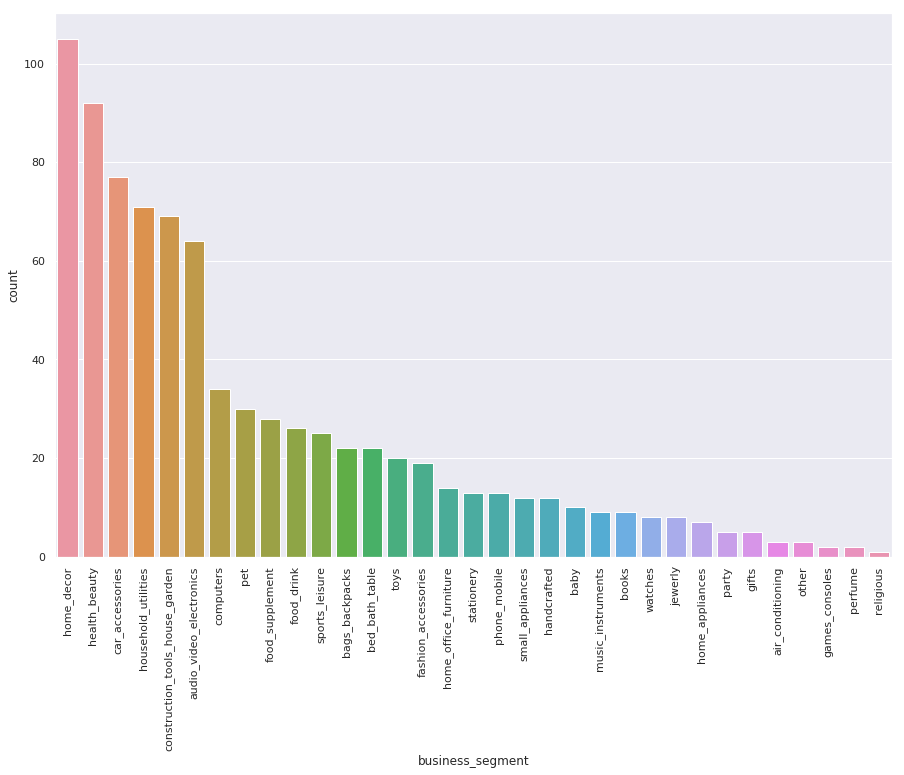

In [26]:
newMFSell.business_segment.value_counts(normalize=True)
chart = sns.countplot(x = newMFSell.business_segment, data = newMFSell, order = newMF.business_segment.value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

online_medium      0.397605
online_big         0.149701
industry           0.147305
offline            0.124551
online_small       0.092216
online_beginner    0.068263
online_top         0.016766
other              0.003593
Name: lead_type, dtype: float64

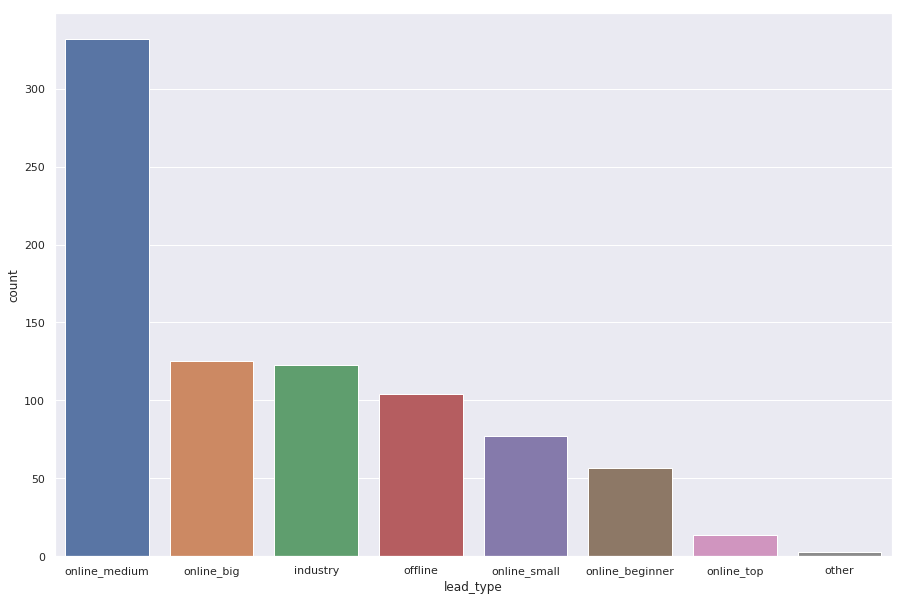

In [27]:
newMFSell.lead_type.value_counts(normalize=True)
sns.countplot(x = newMFSell.lead_type, data = newMFSell, order = newMF.lead_type.value_counts().index)

reseller        0.705174
manufacturer    0.291215
other           0.003610
Name: business_type, dtype: float64

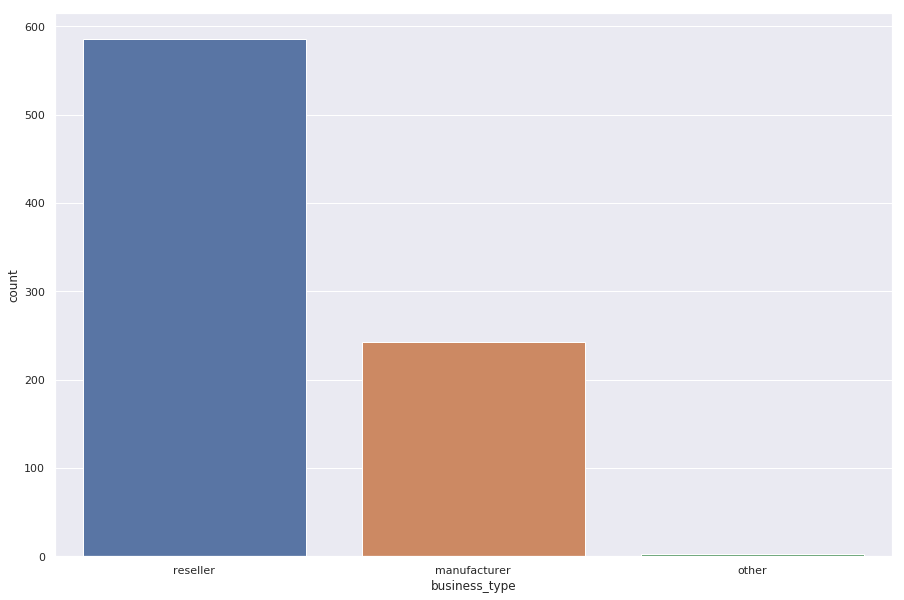

In [28]:
newMFSell.business_type.value_counts(normalize=True)
sns.countplot(x = newMFSell.business_type, data = newMFSell, order = newMF.business_type.value_counts().index)

**Insights**
----------------
- **Sao Paulo** is by far the most popular city in which the Sellers are based
- **Home Decor, Health Beauty and Car Accessories** are the most popular seller segments
- Almost half of the sellers are **Small and Medium Businesses**
- Only **30%** of the sellers manufacture the products they sell, the other **70%** are reselling products

#### Merge with Order Items Dataset

In [29]:
items = pd.read_csv("./marketing-funnel-olist/ecommerce/olist_order_items_dataset.csv")
items.head()
items.shape

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


(112650, 7)

In [30]:
# items.seller_id.value_counts(normalize=True)
summBySeller = items.groupby('seller_id', as_index=False).agg({"order_id" : "count", "price" : "sum", 
                                        "freight_value" : "sum"})
summBySeller.rename({'order_id' : 'order_count', 'price' : 'order_value', 'freight_value' : 'shipping_charges'}, 
                    axis = 1, inplace = True)
summBySeller['aov'] = summBySeller.order_value / summBySeller.order_count # average order value
summBySeller.sort_values(by = 'order_count', ascending=False).head()

,seller_id,order_value,shipping_charges,order_count,aov
1235,6560211a19b47992c3666cc44a7e94c0,123304.83,27960.94,2033,60.651663
881,4a3ca9315b744ce9f8e9374361493884,200472.92,35067.04,1987,100.892260
368,1f50f920176fa81dab994f9023523100,106939.21,35165.77,1931,55.380223
2481,cc419e0650a3c5ba77189a1882b7556a,104288.42,25668.99,1775,58.754039
2643,da8622b14eb17ae2831f4ac5b9dab84a,160236.57,24955.75,1551,103.311779


In [31]:
newMFSellOrders = newMFSell.merge(summBySeller, how = 'left', on = 'seller_id')
newMFSellOrders['orders_exist'] = np.where(newMFSellOrders.order_count.isna() == False, 1, 0)
newMFSellOrders.head()
newMFSellOrders.shape

,mql_id,first_contact_date,landing_page_id,origin,first_contact_month,first_contact_day,weekday_ind,seller_id,sdr_id,sr_id,...,days_to_close,days_to_close_num,seller_zip_code_prefix,seller_city,seller_state,order_value,shipping_charges,order_count,aov,orders_exist
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2,Wednesday,1,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,...,5 days 19:58:54,5.832569,30421.0,belo horizonte,MG,858.00,72.17,3.0,286.000000,1
1,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,4,Wednesday,1,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,...,34 days 20:17:59,34.845822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,4,Tuesday,1,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,...,63 days 17:27:23,63.727350,93542.0,novo hamburgo,RS,23065.02,2307.06,110.0,209.682000,1
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,1,Sunday,0,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,...,3 days 13:51:03,3.577118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,10,Monday,1,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,...,267 days 20:17:45,267.845660,11015.0,santos,SP,573.50,242.71,17.0,33.735294,1


(841, 31)

In [32]:
print("{:.0%}".format(newMFSellOrders.orders_exist.sum()/len(newMFSellOrders)) + " of closed leads have orders on the marketplace.")

45% of closed leads have orders on the marketplace.


In [33]:
# sns.distplot(newMFSellOrders[newMFSellOrders['orders_exist'] == 1]['days_to_close_num'])
# print("Fastest close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 1].days_to_close.min()))
# print("Slowest close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 1].days_to_close.max()))
print("Days to Close Stats for Leads with Orders" , end = "\n\n")
print("Average days to close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 1].days_to_close.mean()))
print("Median number of days to close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 1].days_to_close.median()))
print("Standard Deviation of days to close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 1].days_to_close.std()))

Days to Close Stats for Leads with Orders

Average days to close - 28 days 19:04:11.213720
Median number of days to close - 10 days 12:17:36
Standard Deviation of days to close - 50 days 20:47:15.441281


In [34]:
# sns.distplot(newMFSellOrders[newMFSellOrders['orders_exist'] == 0]['days_to_close_num'])
# print("Fastest close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 0].days_to_close.min()))
# print("Slowest close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 0].days_to_close.max()))
print("Days to Close Stats for Leads without Orders" , end = "\n\n")
print("Average days to close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 0].days_to_close.mean()))
print("Median number of days to close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 0].days_to_close.median()))
print("Standard Deviation of days to close - " + str(newMFSellOrders[newMFSellOrders['orders_exist'] == 0].days_to_close.std()))

Days to Close Stats for Leads without Orders

Average days to close - 65 days 20:49:30.748917
Median number of days to close - 21 days 16:20:59.500000
Standard Deviation of days to close - 87 days 05:03:50.738465


**Insights**
----------------
- Only **45%** of the MQLs who converted have orders on the platform
- Leads who have orders on the marketplace closed much earlier from their first contact solicitation than leads who do not have orders on the marketplace (19 vs 65 days)

# Modeling

#### Data Pipeline for Modeling

In [47]:
# Use only columns from MQL dataset for modeling
col_list = ['mql_id','landing_page_id', 'origin', 'first_contact_day', 'weekday_ind', 'closed_deal']

modelDF = mf[col_list]
modelDF.closed_deal.value_counts()
modelDF.closed_deal.value_counts(normalize=True)
modelDF.origin = np.where(modelDF.origin == 'unknown', 'organic_search', modelDF.origin)

# create landing_page_id_alt feature with only Top 10 pages visited
compare = modelDF.landing_page_id.value_counts().head(n = 10).index.values
# print(compare)
modelDF['landing_page_id_alt'] = np.where(modelDF['landing_page_id'].isin(compare), modelDF['landing_page_id'], 'other')
# modelDF.head()

# down-sample 0's, as 1 value counts are only 10%
from sklearn.utils import resample

positive = modelDF[modelDF.closed_deal == 1]
print("Positive Shape - " + str(positive.shape))
# positive.head()

negative = modelDF[modelDF.closed_deal != 1]
print("Negative Shape - " + str(negative.shape))
# negative.head()

downsample = resample(negative, replace = False, random_state = 42, n_samples = 841)

combined = pd.concat([positive, downsample], axis=0)
combined.shape

# shuffle the dataset
from sklearn.utils import shuffle

balancedDF = shuffle(combined, random_state = 42)
# balancedDF.shape
# balancedDF.head()
balancedDF.closed_deal.value_counts(normalize=True)

# Train and test split
from sklearn.model_selection import train_test_split

col_list = ['landing_page_id_alt', 'origin', 'weekday_ind']
train, test = train_test_split(balancedDF, test_size = 0.2, random_state = 42)
train.shape
test.shape

train_x = train[col_list]
train_Y = train['closed_deal']

test_x = test[col_list]
test_Y = test['closed_deal']

# train_x.head()
# train_Y.value_counts(normalize=True)
# test_Y.value_counts(normalize=True)

# Imputer
print("Number of NULL origin values - " + str(len(train_x[train_x['origin'].isna()])))

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
train_x_imp = pd.DataFrame(imp.fit_transform(train_x), columns=train_x.columns)
# train_x_imp.head()

print("Number of NULL origin values - " + str(len(train_x_imp[train_x_imp['origin'].isna()])))

# One Hot Encoder
train_x_tr1 = pd.get_dummies(train_x_imp[['landing_page_id_alt', 'origin']], columns=['landing_page_id_alt', 'origin'])
train_x_tr  = pd.concat([train_x_tr1, train_x_imp.weekday_ind], axis=1)
train_x_tr.head()
train_x_tr.shape

0    7158
1     841
Name: closed_deal, dtype: int64

0    0.894862
1    0.105138
Name: closed_deal, dtype: float64

Positive Shape - (841, 7)
Negative Shape - (7158, 7)


/Users/nkodiboyana/miniconda2/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/nkodiboyana/miniconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


(1682, 7)

1    0.5
0    0.5
Name: closed_deal, dtype: float64

(1345, 7)

(337, 7)

Number of NULL origin values - 15
Number of NULL origin values - 0


,landing_page_id_alt_22c29808c4f815213303f8933030604c,landing_page_id_alt_40dec9f3d5259a3d2dbcdab2114fae47,landing_page_id_alt_58326e62183c14b0c03085c33b9fdc44,landing_page_id_alt_73f31a40697cc90a86c1273563ac230e,landing_page_id_alt_88740e65d5d6b056e0cda098e1ea6313,landing_page_id_alt_a7982125ff7aa3b2054c6e44f9d28522,landing_page_id_alt_b76ef37428e6799c421989521c0e5077,landing_page_id_alt_ce1a65abd0973638f1c887a6efcfa82d,landing_page_id_alt_e492ee5eaf1697716985cc6f33f9cd9b,landing_page_id_alt_f017be4dbf86243af5c1ebed0cff36a2,...,origin_direct_traffic,origin_display,origin_email,origin_organic_search,origin_other,origin_other_publicities,origin_paid_search,origin_referral,origin_social,weekday_ind
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


(1345, 21)

## Logistic Regression

Features selected are: 
Index(['landing_page_id_alt_22c29808c4f815213303f8933030604c',
       'landing_page_id_alt_40dec9f3d5259a3d2dbcdab2114fae47',
       'landing_page_id_alt_58326e62183c14b0c03085c33b9fdc44',
       'landing_page_id_alt_73f31a40697cc90a86c1273563ac230e',
       'landing_page_id_alt_88740e65d5d6b056e0cda098e1ea6313',
       'landing_page_id_alt_a7982125ff7aa3b2054c6e44f9d28522',
       'landing_page_id_alt_b76ef37428e6799c421989521c0e5077',
       'landing_page_id_alt_ce1a65abd0973638f1c887a6efcfa82d',
       'landing_page_id_alt_e492ee5eaf1697716985cc6f33f9cd9b',
       'landing_page_id_alt_f017be4dbf86243af5c1ebed0cff36a2',
       'landing_page_id_alt_other', 'origin_direct_traffic', 'origin_display',
       'origin_email', 'origin_organic_search', 'origin_other',
       'origin_other_publicities', 'origin_paid_search', 'origin_referral',
       'origin_social', 'weekday_ind'],
      dtype='object')


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 60, 100], 'penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Best params selected by Grid Search - {'C': 60, 'penalty': 'l1'}
Best score selected by Grid Search - 0.6475836431226766


Accuracy of the model is - 0.6505576208178439
CV Accuracy Scores are - [0.63919822 0.63616071 0.66741071]


Confusion Matrix:


array([[500, 188],
       [286, 371]])

Precision of the model is - 0.6636851520572451
Recall of the model is - 0.5646879756468798
ROC AUC score of the model is - 0.6457160808466957


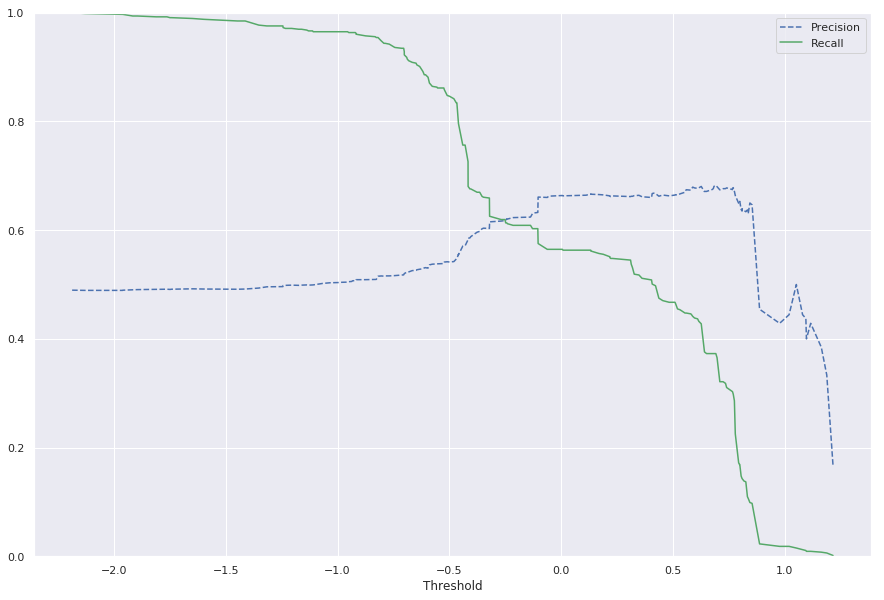

Feature Importance Absolute Values:


landing_page_id_alt_e492ee5eaf1697716985cc6f33f9cd9b    1.505625
landing_page_id_alt_73f31a40697cc90a86c1273563ac230e    1.137318
landing_page_id_alt_b76ef37428e6799c421989521c0e5077    0.757768
origin_email                                            0.703172
landing_page_id_alt_f017be4dbf86243af5c1ebed0cff36a2    0.695404
landing_page_id_alt_22c29808c4f815213303f8933030604c    0.686527
origin_other_publicities                                0.679739
landing_page_id_alt_58326e62183c14b0c03085c33b9fdc44    0.565456
landing_page_id_alt_other                               0.486622
landing_page_id_alt_40dec9f3d5259a3d2dbcdab2114fae47    0.482413
landing_page_id_alt_ce1a65abd0973638f1c887a6efcfa82d    0.416516
origin_other                                            0.415021
landing_page_id_alt_88740e65d5d6b056e0cda098e1ea6313    0.404033
origin_display                                          0.340289
landing_page_id_alt_a7982125ff7aa3b2054c6e44f9d28522    0.308421
origin_social            

Feature Importance:


landing_page_id_alt_b76ef37428e6799c421989521c0e5077    0.757768
landing_page_id_alt_22c29808c4f815213303f8933030604c    0.686527
landing_page_id_alt_40dec9f3d5259a3d2dbcdab2114fae47    0.482413
landing_page_id_alt_ce1a65abd0973638f1c887a6efcfa82d    0.416516
landing_page_id_alt_a7982125ff7aa3b2054c6e44f9d28522    0.308421
origin_referral                                         0.171018
weekday_ind                                             0.169816
origin_paid_search                                      0.164901
origin_direct_traffic                                   0.099634
origin_organic_search                                   0.000000
origin_social                                          -0.178972
origin_display                                         -0.340289
landing_page_id_alt_88740e65d5d6b056e0cda098e1ea6313   -0.404033
origin_other                                           -0.415021
landing_page_id_alt_other                              -0.486622
landing_page_id_alt_58326

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

n_fea = 21 # number of features for RFE
scoring = 'accuracy'
param_grid = [
    {'penalty' : ['l2'], 'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 60, 100], # ridge
     'penalty' : ['l1'], 'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 60, 100] # lasso
    }] # param grid for GridSearchCV
logreg_clf = LogisticRegression(random_state = 42, fit_intercept=True) # log reg model initialize
rfe = RFE(logreg_clf, n_fea) # pass log reg model to RFE with number of features 
selector = rfe.fit(train_x_tr, train_Y) # fit the RFE selector
print("Features selected are: ")
print(train_x_tr.columns[selector.support_])

grid_search = GridSearchCV(logreg_clf, param_grid, cv = 3,
                           scoring = scoring,
                           return_train_score = True)

train_x_tr_sel = selector.transform(train_x_tr) # use transform to get RFE seletcted features
# train_x_tr_sel.shape

grid_search.fit(train_x_tr_sel, train_Y) # fit the log reg model with selected RFE features
print("Best params selected by Grid Search - " + str(grid_search.best_params_))
print("Best score selected by Grid Search - " + str(grid_search.best_score_))
print("\n")

train_y_pred = grid_search.predict(train_x_tr_sel)

print("Accuracy of the model is - " + str(accuracy_score(train_Y, train_y_pred)))
print("CV Accuracy Scores are - " + str(cross_val_score(grid_search.best_estimator_, train_x_tr_sel, 
                                                        train_Y, cv = 3, scoring = scoring)))

train_Y_pred_cv = cross_val_predict(grid_search.best_estimator_, train_x_tr_sel, train_Y, cv = 3)
print("\n")
print("Confusion Matrix:")
confusion_matrix(train_Y, train_Y_pred_cv)
print("Precision of the model is - " + str(precision_score(train_Y, train_Y_pred_cv)))
print("Recall of the model is - " + str(recall_score(train_Y, train_Y_pred_cv)))
print("ROC AUC score of the model is - " + str(roc_auc_score(train_Y, train_Y_pred_cv)))

y_scores = cross_val_predict(grid_search.best_estimator_, train_x_tr_sel, train_Y, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(train_Y, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

print("Feature Importance Absolute Values:")
feature_importance = pd.Series(index = train_x_tr.columns[selector.support_],
                               data = np.abs(grid_search.best_estimator_.coef_[0])).sort_values(ascending = False)
feature_importance.head(n=n_fea)

print("Feature Importance:")
feature_importance = pd.Series(index = train_x_tr.columns[selector.support_],
                               data = grid_search.best_estimator_.coef_[0]).sort_values(ascending = False)
feature_importance.head(n=n_fea)

#### Scoring  the Logistic Regression Model

In [49]:
test_x_imp = pd.DataFrame(imp.fit_transform(test_x), columns=test_x.columns)

test_x_tr1 = pd.get_dummies(test_x_imp[['landing_page_id_alt', 'origin']], columns=['landing_page_id_alt', 'origin'])
test_x_tr  = pd.concat([test_x_tr1, test_x_imp.weekday_ind], axis=1)

print("Train Accuracy Score - " + str(grid_search.best_score_))
print("Test Accuracy Score - " + str(grid_search.score(test_x_tr[test_x_tr.columns[selector.support_]], test_Y)))
# slight reduction in generalization accuracy score

Train Accuracy Score - 0.6475836431226766
Test Accuracy Score - 0.629080118694362


## Decision Tree

In [50]:
train_x_tr_new = train_x_tr.copy()
train_x_tr_new.drop('landing_page_id_alt_other', inplace=True, axis = 1)
# train_x_tr_new.head()

In [51]:
from sklearn.tree import DecisionTreeClassifier

# train_x_tr_new.drop('landing_page_id_alt_other', inplace=True, axis = 1)
n_fea = 22
param_grid = [
    {'criterion' : ['gini'], 'max_depth' : [2, 3, 4, 5],
     'min_samples_split' : [5, 10, 25, 50, 100, 200],
     'max_leaf_nodes' : [5, 10, 15, 20]
    }] # param grid for GridSearchCV
dt_clf = DecisionTreeClassifier(random_state = 42) # DT model initialize
rfe = RFE(dt_clf, n_fea) # pass DT model to RFE with number of features 
selector_dt = rfe.fit(train_x_tr_new, train_Y) # fit the RFE selector_dt
print("Features selected are: ")
print(train_x_tr_new.columns[selector_dt.support_])

grid_search_dt = GridSearchCV(dt_clf, param_grid, cv = 3,
                           scoring='accuracy', return_train_score=True)

train_x_tr_new_sel = selector_dt.transform(train_x_tr_new) # use transform to get RFE seletcted features
# train_x_tr_new_sel.shape

grid_search_dt.fit(train_x_tr_new_sel, train_Y) # fit the log reg model with selected RFE features
print("Best params selected by Grid Search - " + str(grid_search_dt.best_params_))
print("Best score selected by Grid Search - " + str(grid_search_dt.best_score_))
print("\n")


train_y_pred = grid_search_dt.predict(train_x_tr_new_sel)

print("Accuracy of the model is - " + str(accuracy_score(train_Y, train_y_pred)))
print("CV Accuracy Scores are - " + str(cross_val_score(grid_search_dt, train_x_tr_new_sel, train_Y, cv = 3, 
                                                      scoring = 'accuracy')))

train_Y_pred_cv = cross_val_predict(grid_search_dt, train_x_tr_new_sel, train_Y, cv = 3)
print("\n")
print("Confusion Matrix:")
confusion_matrix(train_Y, train_Y_pred_cv)
print("Precision of the model is - " + str(precision_score(train_Y, train_Y_pred_cv)))
print("Recall of the model is - " + str(recall_score(train_Y, train_Y_pred_cv)))
print("ROC AUC score of the model is - " + str(roc_auc_score(train_Y, train_Y_pred_cv)))

print("\n")
print("Feature Importance:")
feature_importance = pd.Series(index = train_x_tr_new.columns[selector_dt.support_],
                data = np.abs(grid_search_dt.best_estimator_.feature_importances_)).sort_values(ascending = False)
feature_importance[feature_importance>0]

Features selected are: 
Index(['landing_page_id_alt_22c29808c4f815213303f8933030604c',
       'landing_page_id_alt_40dec9f3d5259a3d2dbcdab2114fae47',
       'landing_page_id_alt_58326e62183c14b0c03085c33b9fdc44',
       'landing_page_id_alt_73f31a40697cc90a86c1273563ac230e',
       'landing_page_id_alt_88740e65d5d6b056e0cda098e1ea6313',
       'landing_page_id_alt_a7982125ff7aa3b2054c6e44f9d28522',
       'landing_page_id_alt_b76ef37428e6799c421989521c0e5077',
       'landing_page_id_alt_ce1a65abd0973638f1c887a6efcfa82d',
       'landing_page_id_alt_e492ee5eaf1697716985cc6f33f9cd9b',
       'landing_page_id_alt_f017be4dbf86243af5c1ebed0cff36a2',
       'origin_direct_traffic', 'origin_display', 'origin_email',
       'origin_organic_search', 'origin_other', 'origin_other_publicities',
       'origin_paid_search', 'origin_referral', 'origin_social',
       'weekday_ind'],
      dtype='object')


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [2, 3, 4, 5], 'min_samples_split': [5, 10, 25, 50, 100, 200], 'criterion': ['gini'], 'max_leaf_nodes': [5, 10, 15, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Best params selected by Grid Search - {'max_depth': 4, 'min_samples_split': 200, 'criterion': 'gini', 'max_leaf_nodes': 10}
Best score selected by Grid Search - 0.6312267657992565


Accuracy of the model is - 0.6468401486988847
CV Accuracy Scores are - [0.63919822 0.58928571 0.625     ]


Confusion Matrix:


array([[468, 220],
       [294, 363]])

Precision of the model is - 0.6226415094339622
Recall of the model is - 0.5525114155251142
ROC AUC score of the model is - 0.6163719868323245


Feature Importance:


landing_page_id_alt_22c29808c4f815213303f8933030604c    0.366961
landing_page_id_alt_b76ef37428e6799c421989521c0e5077    0.291985
landing_page_id_alt_40dec9f3d5259a3d2dbcdab2114fae47    0.154519
landing_page_id_alt_ce1a65abd0973638f1c887a6efcfa82d    0.117115
landing_page_id_alt_e492ee5eaf1697716985cc6f33f9cd9b    0.053598
weekday_ind                                             0.015821
dtype: float64

#### Scoring the Decision Tree Classifier

In [52]:
test_x_tr_new = test_x_tr.copy()
test_x_tr_new.drop('landing_page_id_alt_other', inplace=True, axis = 1)
print("Train Accuracy Score - " + str(grid_search_dt.best_score_))
print("Test Accuracy Score - " + str(grid_search_dt.score(test_x_tr_new[test_x_tr_new.columns[selector_dt.support_]], test_Y)))
# perrforimg well on the test dataset

Train Accuracy Score - 0.6312267657992565
Test Accuracy Score - 0.6320474777448071


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

n_fea = 15
param_grid = [
    {'criterion' : ['gini'], 'max_depth' : [2, 3, 4, 5],
     'min_samples_split' : [5, 10, 25, 30, 40, 50],
     'max_leaf_nodes' : [5, 10, 15, 20],
     'n_estimators' : [100]
    }] # param grid for GridSearchCV
rf_clf = RandomForestClassifier(random_state = 42, n_jobs = -1) # DT model initialize
rfe = RFE(rf_clf, n_fea) # pass DT model to RFE with number of features 
selector_rf = rfe.fit(train_x_tr_new, train_Y) # fit the RFE selector_rf
print("Features selected are: ")
print(train_x_tr_new.columns[selector_rf.support_])

grid_search_rf = GridSearchCV(rf_clf, param_grid, cv = 3,
                           scoring='accuracy', return_train_score=True)

train_x_tr_new_sel = selector_rf.transform(train_x_tr_new) # use transform to get RFE seletcted features
# train_x_tr_new_sel.shape

grid_search_rf.fit(train_x_tr_new_sel, train_Y) # fit the log reg model with selected RFE features
print("Best params selected by Grid Search - " + str(grid_search_rf.best_params_))
print("Best score selected by Grid Search - " + str(grid_search_rf.best_score_))
print("\n")


train_y_pred = grid_search_rf.predict(train_x_tr_new_sel)

print("Accuracy of the model is - " + str(accuracy_score(train_Y, train_y_pred)))
print("CV Accuracy Scores are - " + str(cross_val_score(grid_search_rf, train_x_tr_new_sel, train_Y, cv = 3, 
                                                      scoring = 'accuracy')))

train_Y_pred_cv = cross_val_predict(grid_search_rf, train_x_tr_new_sel, train_Y, cv = 3)
print("\n")
print("Confusion Matrix:")
confusion_matrix(train_Y, train_Y_pred_cv)
print("Precision of the model is - " + str(precision_score(train_Y, train_Y_pred_cv)))
print("Recall of the model is - " + str(recall_score(train_Y, train_Y_pred_cv)))
print("ROC AUC score of the model is - " + str(roc_auc_score(train_Y, train_Y_pred_cv)))

print("\n")
print("Feature Importance:")
feature_importance = pd.Series(index = train_x_tr_new.columns[selector_rf.support_],
                data = np.abs(grid_search_rf.best_estimator_.feature_importances_)).sort_values(ascending = False)
feature_importance[feature_importance>0]

Features selected are: 
Index(['landing_page_id_alt_22c29808c4f815213303f8933030604c',
       'landing_page_id_alt_40dec9f3d5259a3d2dbcdab2114fae47',
       'landing_page_id_alt_88740e65d5d6b056e0cda098e1ea6313',
       'landing_page_id_alt_a7982125ff7aa3b2054c6e44f9d28522',
       'landing_page_id_alt_b76ef37428e6799c421989521c0e5077',
       'landing_page_id_alt_ce1a65abd0973638f1c887a6efcfa82d',
       'landing_page_id_alt_e492ee5eaf1697716985cc6f33f9cd9b',
       'landing_page_id_alt_f017be4dbf86243af5c1ebed0cff36a2',
       'origin_direct_traffic', 'origin_email', 'origin_organic_search',
       'origin_paid_search', 'origin_referral', 'origin_social',
       'weekday_ind'],
      dtype='object')


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [2, 3, 4, 5], 'min_samples_split': [5, 10, 25, 30, 40, 50], 'criterion': ['gini'], 'max_leaf_nodes': [5, 10, 15, 20], 'n_estimators': [100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Best params selected by Grid Search - {'max_depth': 4, 'min_samples_split': 10, 'criterion': 'gini', 'max_leaf_nodes': 10, 'n_estimators': 100}
Best score selected by Grid Search - 0.6327137546468401


Accuracy of the model is - 0.649814126394052
CV Accuracy Scores are - [0.62806236 0.61830357 0.64732143]


Confusion Matrix:


array([[526, 162],
       [334, 323]])

Precision of the model is - 0.6659793814432989
Recall of the model is - 0.4916286149162861
ROC AUC score of the model is - 0.6280817493186083


Feature Importance:


landing_page_id_alt_b76ef37428e6799c421989521c0e5077    0.252320
landing_page_id_alt_22c29808c4f815213303f8933030604c    0.164230
landing_page_id_alt_e492ee5eaf1697716985cc6f33f9cd9b    0.091536
landing_page_id_alt_40dec9f3d5259a3d2dbcdab2114fae47    0.077524
origin_social                                           0.076567
origin_organic_search                                   0.074017
origin_email                                            0.055083
origin_paid_search                                      0.042209
landing_page_id_alt_ce1a65abd0973638f1c887a6efcfa82d    0.040071
weekday_ind                                             0.032526
landing_page_id_alt_f017be4dbf86243af5c1ebed0cff36a2    0.029075
landing_page_id_alt_88740e65d5d6b056e0cda098e1ea6313    0.024658
origin_direct_traffic                                   0.015728
origin_referral                                         0.014384
landing_page_id_alt_a7982125ff7aa3b2054c6e44f9d28522    0.010073
dtype: float64

#### Scoring the Random Forest Classifier

In [56]:
print("Train Accuracy Score - " + str(grid_search_rf.best_score_))
print("Test Accuracy Score - " + str(grid_search_rf.score(test_x_tr_new[test_x_tr_new.columns[selector_rf.support_]], test_Y)))
# slight reduction in generalization score

Train Accuracy Score - 0.6327137546468401
Test Accuracy Score - 0.6023738872403561
